In [52]:
import random
import matplotlib.pyplot as plt
import numpy as np
import tqdm 

In [65]:
box_size1 = 1 
box_size2 = 10
box_size3 = 10 #en cm
box_size = 10
sphere_diameter = 3# 4 um
sphere_radius = sphere_diameter / 2
sphere_volume = (4/3) * np.pi * sphere_radius**3

max_attempts = 80000000 # máximo numero de intentos para llenar una posición permitida

#coordenadas de las esferas
sphere_coordinates = []



In [66]:
# definamos el overlap entre esferas existentes y esferas por posicionar
def check_overlap(new_sphere_coords):
    for coords in sphere_coordinates:
        distance = np.sqrt((coords[0] - new_sphere_coords[0])**2 +
                             (coords[1] - new_sphere_coords[1])**2 +
                             (coords[2] - new_sphere_coords[2])**2)
        if distance < sphere_diameter:
            return True
    return False




In [ ]:
# Creemos posiciones aleatorioas
attempts = 0
while True:
    #Nuevas coordenadas aleatorias de una esfera
    new_sphere_coords = [random.uniform(0, box_size),
                         random.uniform(0, box_size),
                         random.uniform(0, box_size)]
    
    # si existe overlap entonces...
    if not check_overlap(new_sphere_coords):
        # si no, coloque una nueva esfera
        sphere_coordinates.append(new_sphere_coords)
        
        # MIremos cuanto volumen esta llenandose 
        filled_volume = len(sphere_coordinates) * sphere_volume
        
        # SI se llena entonces pare, si ocupamos todos los intentos, pare.
        if filled_volume >= box_size**3 or attempts >= max_attempts:
            break
        
    attempts += 1

# Muestre numero de esferas y volumen ocupado
print("Number of spheres:", len(sphere_coordinates))
print("Filled volume:", filled_volume, "cubic cm")
print("box volume:",box_size**3, "cubic cm")

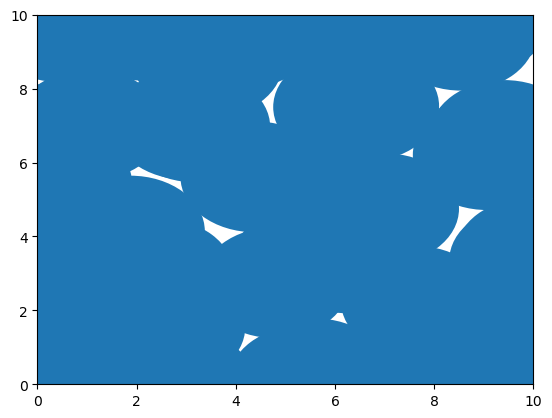

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0,box_size)
ax.set_ylim(0,box_size)

for i in range(len(sphere_coordinates)):
    circle = plt.Circle((sphere_coordinates[i][0],sphere_coordinates[i][1]),sphere_radius)
    ax.add_patch(circle)
                                                        


In [ ]:
#sphere_coordinates

#np.savetxt('coord',sphere_coordinates)